# Evaluate Lesson Exercises

Do you work for this exercise in either a jupyter notebook named `evaluate` within your regression-exercises repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name `evaluate` within your regression-exercises repo.

In [ ]:
# References:
# https://github.com/CodeupClassroom/darden-regression-exercises/blob/master/eval.ipynb

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

import math
from sklearn.metrics import mean_squared_error
from math import sqrt


from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")
df.to_csv('lemonade.csv', index = False)

In [2]:
df = pd.read_csv('lemonade.csv')
df

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18
...,...,...,...,...
360,42.7,1.00,33,19
361,37.8,1.25,32,16
362,39.5,1.25,17,15
363,30.9,1.43,22,13


In [3]:
# Settling significance level and alpha:

significance_level = .95
alpha = round(1-significance_level, 2)

In [4]:
# Creating a baseline (using the mean) for the sales column

df.sales.mean()

25.323287671232876

## Building a Super Simple Model (SSM™)

In [13]:
# building the super-simple linear model (step 1):

model = ols('sales ~ flyers', data = df).fit()
# predictions = model.predict(df.x)

In [14]:
model

In [15]:
# Now that I've fit the model (which usually would be to my train data, I'll create the dataframe that contains the x and y parameters and eventually the predictions)

evaluate = pd.DataFrame()

evaluate['x'] = df.flyers
evaluate.head()

,x
0,15
1,15
2,27
3,28
4,33


In [16]:
# y variable is sales, and the baseline is the mean of sales.
evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

# y-hat is a common shorthand for "predicted y" values in statistics
evaluate['yhat'] = model.predict()

# Calc the baseline residuals (errors)
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calc the model's residuals:
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107
4,33,18,25.323288,22.255013,7.323288,4.255013


In [17]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (evaluate.baseline_residual**2).sum()
baseline_mse = baseline_sse/len(df)
baseline_rmse = sqrt(baseline_mse)


model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


In [18]:
# Calculating SSE
model_sse = (evaluate.model_residual**2).sum()

# Calcuating MSE
model_mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Calculating RMSE
model_rmse = sqrt(model_mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", model_mse, " which is the average squared error")
print("RMSE is", model_rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [19]:
rmse_baseline = sqrt(baseline_mse)

print("Model RMSE = ", model_rmse)
print("Baseline RMSE = ", rmse_baseline)

Model RMSE =  4.082480526073233
Baseline RMSE =  6.884139415539732


The model is off by an average of 4 units, while the baseline average is off by over 6 units. Thus our model is  better than the baseline model.

### Model Significance Evaluation with $R^2$

In [20]:
r2 = model.rsquared
print('R-squared =', round(r2, 3))

R-squared = 0.648


In [21]:
# Now to evaluate the p-value:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [22]:
f_pval < alpha

True

In [23]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls = ':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($ - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

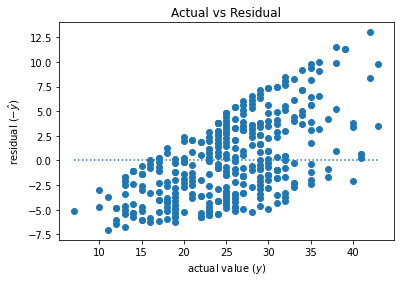

In [24]:
plot_residuals(evaluate.y, evaluate.yhat)
plt.show()

In [25]:
def model_function(linear_model, target, feature):
    
    '''
    This function will take in a linear model, a target variable, and a feature. It will calculate if the baseline model or the super simple model is a better fit for the data. If the user's model is a better fit, will run through the SSE, MSE, and RMSE calucations to generate model metrics and check model significance, and return a scatterplot of the model on the dataset.    
    '''
    
    baseline = target.mean()
    model = linear_model
    evaluate = pd.DataFrame()
    evaluate['x'] = feature
    
    # y variable is sales, and the baseline is the mean of sales.
    evaluate["y"] = target
    evaluate["baseline"] = target.mean()

    # y-hat is a common shorthand for "predicted y" values in statistics
    evaluate['yhat'] = model.predict()

    # Calc the baseline residuals (errors)
    evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

    # Calc the model's residuals:
    evaluate["model_residual"] = evaluate.yhat - evaluate.y
    
    # Now the function calculates the SSE, MSE, and RMSE:
    # Calculate if the model beats the baseline
    # Square errors for 2 reasons:
        # 1. Squaring large numbers increases their magnitude (opposite for small)
        # 2. Squaring removes negative residuals
        
    baseline_sse = (evaluate.baseline_residual**2).sum()
    model_sse = (evaluate.model_residual**2).sum()

    if model_sse > baseline_sse:
        print("Our baseline is better than the model")
    
    else:
        print("Our model beats the baseline")
        
        metrics = pd.DataFrame()
        
        # Calculating SSE
        model_sse = (evaluate.model_residual**2).sum()

        # Calcuating MSE
        mse = mean_squared_error(evaluate.y, evaluate.yhat)

        # Calculating RMSE
        rmse = sqrt(mse)

        print("SSE is", model_sse, " which is the sum sf squared errors")
        print("MSE is", mse, " which is the average squared error")
        print("RMSE is", rmse, " which is the square root of the MSE")
        
        # Evaluate the model significance using r-squared.
        r2 = model.rsquared
        print('R-squared =', round(r2, 3))
        
        
        # Now to evaluate the p-value:
        f_pval = model.f_pvalue
        print("p-value for model significance = ", f_pval)
        
        
        # Nested function to generate plot:
        def plot_residuals(actual, predicted):
            residuals = actual - predicted
            plt.hlines(0, actual.min(), actual.max(), ls = ':')
            plt.scatter(actual, residuals)
            plt.ylabel('residual ($ - \hat{y}$)')
            plt.xlabel('actual value ($y$)')
            plt.title('Actual vs Residual')
            return plt.gca()
        
        actual = evaluate.y
        predicted = evaluate.yhat
        plot_residuals(evaluate.y, evaluate.yhat)

## Drill time! Repetition is key!

In [26]:
# Goal is to take these steps and make a function out of them.
# Use a different feature from my dataset.

In [27]:
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


### Using rainfall as my feature

In [6]:
baseline = df.sales.mean()

In [7]:
# Create and fit the model:

model_rainfall = ols('sales ~ rainfall', data = df).fit()

In [8]:
# Now that I've fit the model (which usually would be to my train data, I'll create the dataframe that contains the x and y parameters and eventually the predictions)

evaluate_rainfall = pd.DataFrame()

evaluate_rainfall['x'] = df.rainfall
evaluate_rainfall

,x
0,2.00
1,1.33
2,1.33
3,1.05
4,1.00
...,...
360,1.00
361,1.25
362,1.25
363,1.43


In [10]:
# y variable is sales, and the baseline is the mean of sales.
evaluate_rainfall["y"] = df.sales
evaluate_rainfall["baseline"] = df.sales.mean()

# y-hat is a common shorthand for "predicted y" values in statistics
evaluate_rainfall['yhat'] = model_rainfall.predict()

# Calc the baseline residuals (errors)
evaluate_rainfall["baseline_residual"] = evaluate_rainfall.baseline - evaluate_rainfall.y

# Calc the model's residuals:
evaluate_rainfall["model_residual"] = evaluate_rainfall.yhat - evaluate_rainfall.y

evaluate_rainfall.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573
4,1.00,18,25.323288,21.344793,7.323288,3.344793


In [11]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse_rain = (evaluate_rainfall.baseline_residual**2).sum()
baseline_mse_rain = baseline_sse_rain/len(df)
baseline_rmse_rain = sqrt(baseline_mse_rain)


model_sse_rain = (evaluate_rainfall.model_residual**2).sum()

if model_sse_rain < baseline_sse_rain:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse_rain)
print("Model SSE", model_sse_rain)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [28]:
# Finding the r2:

r2 = model_rainfall.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.827


In [29]:
f_pval = model_rainfall.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  3.2988846597381e-140


In [32]:
f_pval < alpha

True

# More Practice:
Using different features and datasets

In [ ]:
model_function(model, df.sales, df.rainfall)

In [ ]:
# Use log_rainfall column as the feature (independent variable)

df['log_rainfall'] = np.log(df.rainfall)

In [ ]:
# Create and fit the model:

model = ols('sales ~ log_rainfall', data = df).fit()

In [ ]:
model_function(model, df.sales, df.log_rainfall)

In [ ]:
model_temp = ols('sales ~ temperature', data = df).fit()

In [ ]:
model_function(model_temp, df.sales, df.temperature)

### Which of these 4 single regression models would you want to move forward with?

In [ ]:
# df_eval = pd.DataFrame(np.array([SSE]))

In [ ]:
print('model:')
print(model_sse)
print(model_mse)
print(model_rmse)
print('\nbaseline:')
print(baseline_sse)
print(baseline_mse)
print(baseline_rmse)

In [ ]:
metric_name = ['SSE', 'MSE', 'RMSE']

In [ ]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([model_sse, model_mse, model_rmse])
df_baseline_eval['model_error'] = np.array([baseline_sse, baseline_mse, baseline_rmse])

print(df_eval)
print(df_baseline_eval)

In [ ]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

#### It's clear the model is much better than our baseline

# Using the Tips database

In [34]:
tip_df = data('tips')

tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [38]:
tip_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

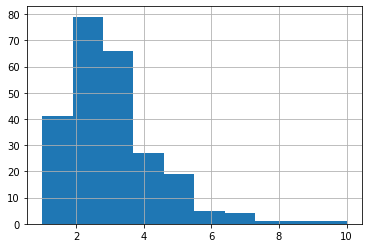

In [40]:
tip_df.tip.hist()

In [35]:
# Defining the baseline for tips:

baseline_model = tip_df.tip.mean()
baseline_model

# This would be a horizontal line if graphed.

2.9982786885245902

In [46]:
# Super Simple Model
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
# Fitting the model for the tips data, using the total_bill feature:

model_tips = ols('tip ~ total_bill', data = tip_df).fit()

In [50]:
# tip_predictions = model.predict(tip_df.x)
tip_eval = pd.DataFrame()

tip_eval['x'] = tip_df.total_bill

# y is dependent variable:
tip_eval['y'] = tip_df.tip
tip_eval['baseline'] = tip_df.tip.mean()

# y-hat is the shorthand for "predicted y" values
tip_eval['yhat'] = model_tips.predict()

# Calc baseline residuals:
tip_eval['baseline_residual'] = tip_eval.baseline - tip_eval.y

# Calc the model residuals:
tip_eval['model_residual'] = tip_eval.yhat - tip_eval.y

tip_eval.head()

,x,y,baseline,yhat,baseline_residual,model_residual
1,16.99,1.01,2.998279,2.704636,1.988279,1.694636
2,10.34,1.66,2.998279,2.006223,1.338279,0.346223
3,21.01,3.50,2.998279,3.126835,-0.501721,-0.373165
4,23.68,3.31,2.998279,3.407250,-0.311721,0.097250
5,24.59,3.61,2.998279,3.502822,-0.611721,-0.107178


In [51]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (tip_eval.baseline_residual**2).sum()
model_sse = (tip_eval.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 252.788743850776


In [52]:
# Sum the squares of the baseline errors
model_sse = (evaluate.model_residual**2).sum()

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [54]:
r2_tip = model_tips.rsquared
print('R-squared = ', round(r2_tip,3))


f_pval = model_tips.f_pvalue
print("p-value for model significance = ", f_pval)

R-squared =  0.457
p-value for model significance =  6.692470646863376e-34


In [55]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

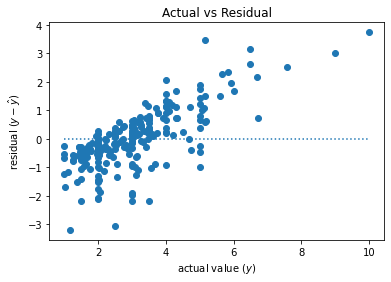

In [57]:
plot_residuals(tip_eval.y, tip_eval.yhat)
plt.show()

In [88]:
def regression_errors(y, yhat, df):
    
    # Sum of squared errors (SSE):
    model_sse = (df.model_residual**2).sum()
    
    # mean squared error (MSE)
    model_mse = model_sse/len(df)

    # root mean squared error (RMSE)
    model_rmse = sqrt(model_mse)
    
    # explained sum of squares (ESS)
    model_ess = sum((df.yhat - df.y.mean())**2)
    
    # total sum of squares (TSS)
    model_tss = model_ess + model_sse
    
    return model_sse, model_mse, model_rmse, model_ess, model_tss
    

In [82]:
def baseline_mean_errors(y, df):
    # Sum of squared errors (SSE):
    baseline_sse = (df.baseline_residual**2).sum()
    
    # mean squared error (MSE)
    baseline_mse = baseline_sse/len(df)

    # root mean squared error (RMSE)
    baseline_rmse = sqrt(baseline_mse)
    
    return baseline_sse, baseline_mse, baseline_rmse

In [83]:
tip_eval.head()

,x,y,baseline,yhat,baseline_residual,model_residual
1,16.99,1.01,2.998279,2.704636,1.988279,1.694636
2,10.34,1.66,2.998279,2.006223,1.338279,0.346223
3,21.01,3.50,2.998279,3.126835,-0.501721,-0.373165
4,23.68,3.31,2.998279,3.407250,-0.311721,0.097250
5,24.59,3.61,2.998279,3.502822,-0.611721,-0.107178


In [84]:
baseline_mean_errors('tip', tip_eval)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [89]:
regression_errors('tip', 'yhat', tip_eval)

(252.788743850776,
 1.036019442011377,
 1.0178504025697377,
 212.42373319840428,
 465.2124770491803)

In [90]:
model_sse_test = regression_errors('tip', 'yhat', tip_eval)
model_sse_test

(252.788743850776,
 1.036019442011377,
 1.0178504025697377,
 212.42373319840428,
 465.2124770491803)

In [93]:
def better_than_baseline(y, yhat, df):
    
    # Model metrics:
    
    # Sum of squared errors (SSE):
    model_sse = (df.model_residual**2).sum()
    
    # mean squared error (MSE)
    model_mse = model_sse/len(df)

    # root mean squared error (RMSE)
    model_rmse = sqrt(model_mse)
    
    # explained sum of squares (ESS)
    model_ess = sum((df.yhat - df.y.mean())**2)
    
    # total sum of squares (TSS)
    model_tss = model_ess + model_sse
    

    # Baseline metrics:
    # Sum of squared errors (SSE):
    baseline_sse = (df.baseline_residual**2).sum()
    
    # mean squared error (MSE)
    baseline_mse = baseline_sse/len(df)

    # root mean squared error (RMSE)
    baseline_rmse = sqrt(baseline_mse)
    
    if model_sse < baseline_sse:
        print("Our model beats the baseline.")
    else:
        print("Our baseline is better than the model.")
    print("Baseline SSE", baseline_sse)
    print("Model SSE", model_sse)
    

    
    

In [94]:
better_than_baseline('y', 'yhat', tip_eval)

Our model beats the baseline.
Baseline SSE 465.2124770491804
Model SSE 252.788743850776


In [ ]:
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse_rain = (evaluate_rainfall.baseline_residual**2).sum()
baseline_mse_rain = baseline_sse_rain/len(df)
baseline_rmse_rain = sqrt(baseline_mse_rain)


model_sse_rain = (evaluate_rainfall.model_residual**2).sum()

if model_sse_rain < baseline_sse_rain:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse_rain)
print("Model SSE", model_sse_rain)

In [ ]:
baseline_sse_rain = (evaluate_rainfall.baseline_residual**2).sum()

In [ ]:
# Sum the squares of the baseline errors
model_sse = (evaluate.model_residual**2).sum()

# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

# Using the MPG dataset